In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\MEHEDI~1\AppData\Local\Temp/ipykernel_10468/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


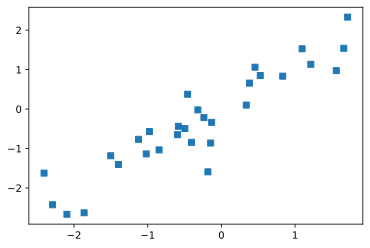

In [2]:
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [3]:
ANNreg=nn.Sequential(nn.Linear(1,1),nn.ReLU(),nn.Linear(1,1))
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
learningRate= 0.05
lossfun=nn.MSELoss()
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [5]:
numepochs=500
losses=torch.zeros(numepochs)

for epochi in range(numepochs):
    
    yHat=ANNreg(x)
    
    loss=lossfun(yHat,y)
    losses[epochi]=loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [6]:
predictions=ANNreg(x)

testloss=(predictions-y).pow(2).mean()



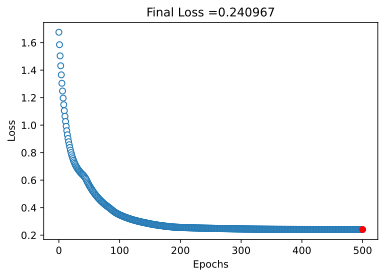

In [7]:
plt.plot(losses.detach(),'o',linewidth=.1,markerfacecolor='w')
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Final Loss =%g' %testloss.item())
plt.show();

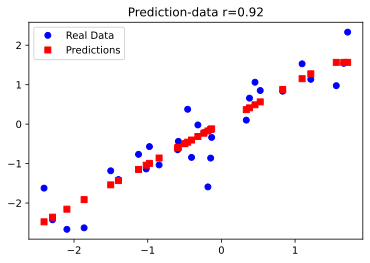

In [8]:
plt.plot(x,y,'bo',label='Real Data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'Prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show();